In [1148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import yfinance as yf
import fredapi as fa
from datetime import date, timedelta
from Exposure_Report import Exposure
import numpy as np
import matplotlib.pyplot as plt
import Useful_Functions as u
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')



In [1150]:
ticker = "XLF"
rolls = 30

# .iloc[:,-3:]
sector_df = pd.read_csv("sectors_and_rates.csv", index_col="Date")
#sector_df[ticker] = yf.download(ticker, start = "2006-01-04", progress=False)['Close']
#sector_df['SP-500_roll'] = sector_df['SP-500'].rolling(rolls).mean()
#sector_df['Real Yield'] = sector_df['Real Yield'].rolling(rolls).mean()
#sector_df['Yield Curve'] = sector_df['Yield Curve'].rolling(rolls).mean()
# .rolling(rolls).mean()
sector_df['inflation'] = fred.get_series('T10YIE', observation_start = '2006-01-04', end = date.today())
#sector_df['oil'] = fred.get_series('DCOILBRENTEU', observation_start = '2006-01-04', end = date.today())
sector_df['uncertainty_index'] = fred.get_series('USEPUINDXD', observation_start = '2006-01-04', end = date.today())
sector_df['market_volume'] = yf.download("^GSPC", start = "2006-01-04", progress=False)['Volume']
# *252**.5
sector_df['market_volatility'] = (np.log(sector_df["SP-500"]/sector_df["SP-500"].shift())).rolling(rolls).std()
sector_df = sector_df.dropna()



In [1151]:

#sector_df.to_csv("macro_data.csv")
sector_df



,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,SP-500,Real Yield,Yield Curve,inflation,uncertainty_index,market_volume,market_volatility
Date,,,,,,,,,,,,,,,,,,
2010-02-17,191.820007,247.860001,235.979996,277.910004,364.000000,192.360001,353.339996,104.250000,147.800003,90.900002,424.299988,1099.510010,1.46,2.87,2.28,107.08,4259230000,0.011477
2010-02-18,194.050003,250.330002,237.440002,279.869995,365.670013,193.440002,356.260010,104.089996,148.660004,92.269997,426.429993,1106.750000,1.48,2.89,2.31,110.98,3878620000,0.011537
2010-02-19,194.929993,251.529999,238.259995,280.109985,365.079987,194.600006,355.829987,103.750000,150.779999,92.709999,427.130005,1109.170044,1.52,2.83,2.26,143.63,3944280000,0.011548
2010-02-22,194.020004,251.669998,237.960007,279.679993,364.790009,196.820007,354.839996,103.480003,149.789993,92.919998,421.510010,1108.010010,1.55,2.89,2.25,116.03,3814440000,0.011512
2010-02-23,190.669998,248.589996,236.630005,278.100006,360.750000,193.309998,349.980011,102.500000,148.580002,91.779999,415.170013,1094.599976,1.50,2.82,2.19,129.91,4521050000,0.011665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-07,551.690002,819.640015,1208.400024,768.109985,1530.060059,584.010010,2473.110107,203.449997,379.589996,276.309998,697.380005,4160.680176,0.25,0.23,2.73,173.01,3476470000,0.019781
2022-06-08,540.099976,804.650024,1200.180054,758.710022,1518.099976,574.059998,2445.629883,203.399994,372.059998,269.589996,698.429993,4115.770020,0.28,0.25,2.75,111.53,3090180000,0.019189
2022-06-09,527.190002,788.809998,1176.699951,747.320007,1483.319946,559.099976,2379.000000,197.800003,362.989990,263.420013,682.349976,4017.820068,0.29,0.21,2.75,115.16,3192330000,0.019657


In [1154]:

# "inflation", "uncertainty",
# 'volume', "SP-500", 'market_volatility'

compares = ['Real Yield', 'Yield Curve', "inflation", "uncertainty_index", 'market_volume', 'market_volatility', "SP-500"]
sector_exposure = Exposure(sector_df, 252, 30, compares, "SP-500")


In [1156]:

sector_exposure.forward_returns_daily



,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Technology,Telecomm,Utilities,Real Estate,Energy,Real Yield_scores,Yield Curve_scores,inflation_scores,uncertainty_index_scores,market_volume_scores,market_volatility_scores,SP-500_scores
2010-02-17,0.003137,0.038845,0.032645,-0.026818,-0.039746,0.052804,0.003058,-0.026182,-0.043971,0.070071,-0.049427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-18,0.009018,0.033443,0.033072,-0.029773,-0.039637,0.055983,-0.005578,-0.015472,-0.037561,0.058215,-0.038884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-19,0.010796,0.030336,0.036082,-0.037508,-0.046928,0.054305,0.001350,-0.010325,-0.052460,0.070195,-0.029829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-22,0.015416,0.026838,0.036232,-0.042242,-0.050822,0.050327,0.001866,-0.014447,-0.039711,0.086430,-0.018737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-23,0.019915,0.027229,0.029872,-0.048794,-0.050486,0.057811,0.007719,-0.036062,-0.047683,0.062693,-0.020090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,0.059207,0.016374,-0.100296,-0.044232,0.007429,0.001175,0.002988,0.002046,0.044766,-0.069554,0.275670,3.0,-4.0,2.0,0.0,1.0,0.0,-2.0
2022-04-26,0.036144,0.002748,-0.078237,-0.059120,0.001269,-0.007710,0.011929,0.016205,0.017822,-0.095472,0.259696,2.0,-2.0,1.0,-2.0,1.0,3.0,-5.0
2022-04-27,0.022649,0.005346,-0.069884,-0.050013,0.005261,-0.006749,-0.002785,0.040265,0.023368,-0.084618,0.238749,3.0,-2.0,1.0,-1.0,1.0,2.0,-4.0
2022-04-28,0.028513,0.016652,-0.075820,-0.015695,0.027295,-0.002893,-0.025281,0.025904,0.055603,-0.070668,0.232958,3.0,-1.0,2.0,-1.0,1.0,3.0,-2.0


In [1157]:

sector_labels = {sec : num for num, sec in enumerate(sector_exposure.sectors)}
sector_labels_reverse = {num : sec for num, sec in enumerate(sector_exposure.sectors)}

sector_labels


{'Materials': 0,
 'Industrials': 1,
 'Consumer Discretionary': 2,
 'Consumer Staples': 3,
 'Health Care': 4,
 'Financials': 5,
 'Technology': 6,
 'Telecomm': 7,
 'Utilities': 8,
 'Real Estate': 9,
 'Energy': 10}

In [1159]:


consideration_df = sector_exposure.forward_returns_daily.dropna()
#consideration_df[u.tech].loc[ consideration_df.inflation_scores == -4 ].hist()
#consideration_df = round(u.get_monthly_data(consideration_df), 0)

assessment_df = consideration_df.copy().iloc[:,:11][int(len(consideration_df)*.7):]
#consideration_df['top_sector_returns'] = consideration_df[sector_exposure.sectors].max(axis=1)
consideration_df['top_sector'] = [consideration_df.iloc[:,:11].loc[i].sort_values().index[-1] for i in consideration_df.iloc[:,:11].index]
consideration_df['top_sector_returns'] = [consideration_df.iloc[:,:11].loc[i].sort_values()[-1] for i in consideration_df.iloc[:,:11].index]
consideration_df['top_sector'] = [sector_labels[i] for i in consideration_df['top_sector']]

consideration_df = consideration_df.iloc[:,-len(sector_exposure.compare_against)-2:]


# consideration_df.iloc[:,:11].max(axis = 1)
consideration_df

#consideration_df[sector_exposure.sectors]


/var/folders/5c/pr4qxx_n549__j7rk3s5rgkc0000gp/T/ipykernel_19539/1696504200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consideration_df['top_sector'] = [consideration_df.iloc[:,:11].loc[i].sort_values().index[-1] for i in consideration_df.iloc[:,:11].index]
/var/folders/5c/pr4qxx_n549__j7rk3s5rgkc0000gp/T/ipykernel_19539/1696504200.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consideration_df['top_sector_returns'] = [consideration_df.iloc[:,:11].loc[i].sort_values()[-1] for i in consideratio

,Real Yield_scores,Yield Curve_scores,inflation_scores,uncertainty_index_scores,market_volume_scores,market_volatility_scores,SP-500_scores,top_sector,top_sector_returns
2011-02-25,-3.0,-0.0,3.0,0.0,1.0,0.0,1.0,7,0.052590
2011-02-28,-2.0,0.0,2.0,-1.0,-3.0,0.0,1.0,7,0.047391
2011-03-01,-1.0,1.0,2.0,-0.0,-3.0,0.0,1.0,7,0.044770
2011-03-02,-1.0,1.0,2.0,3.0,-3.0,-0.0,2.0,7,0.044138
2011-03-03,0.0,2.0,2.0,-1.0,2.0,0.0,3.0,7,0.061370
...,...,...,...,...,...,...,...,...,...
2022-04-25,3.0,-4.0,2.0,0.0,1.0,0.0,-2.0,10,0.275670
2022-04-26,2.0,-2.0,1.0,-2.0,1.0,3.0,-5.0,10,0.259696
2022-04-27,3.0,-2.0,1.0,-1.0,1.0,2.0,-4.0,10,0.238749
2022-04-28,3.0,-1.0,2.0,-1.0,1.0,3.0,-2.0,10,0.232958


In [1207]:


assessment_df



,predicted_top_sector,actual_top_sector,predicted_top_sector_returns,actual_top_sector_returns,correct_choice,consecutive_signals
2019-02-14,Technology,Technology,0.041135,0.041135,1,0
2019-02-15,Telecomm,Technology,0.010647,0.046962,0,0
2019-02-19,Technology,Technology,0.051583,0.051583,1,0
2019-02-20,Financials,Technology,-0.036976,0.059778,0,0
2019-02-21,Technology,Technology,0.048648,0.048648,1,0
...,...,...,...,...,...,...
2022-04-25,Energy,Energy,0.275670,0.275670,1,0
2022-04-26,Energy,Energy,0.259696,0.259696,1,1
2022-04-27,Energy,Energy,0.238749,0.238749,1,2
2022-04-28,Energy,Energy,0.232958,0.232958,1,3


In [1164]:



consideration_df.pivot_table(index = ['top_sector'], aggfunc ='size')





top_sector
0     154
1      75
2     185
3     117
4     237
5     207
6     511
7     192
8     298
9     232
10    457
dtype: int64

In [1165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

cutoff = int(len(consideration_df)*.7)

'''

For One sector ML Project

X = consideration_df.iloc[:,1:][:cutoff].values
y = consideration_df.iloc[:,0][:cutoff].values
y_labeled = np.select([y > 0, y<= 0], [1,0])

X_test = consideration_df.iloc[:,1:][cutoff:].values
y_test = consideration_df.iloc[:,0][cutoff:].values
y_test_labeled = np.select([y_test > 0, y_test <= 0], [1,0])

'''

X = consideration_df.iloc[:,:-2][:cutoff].values
y = consideration_df.iloc[:,-2][:cutoff].values
X_test = consideration_df.iloc[:,:-2][cutoff:].values
y_test = consideration_df.iloc[:,-2][cutoff:].values



<AxesSubplot:>

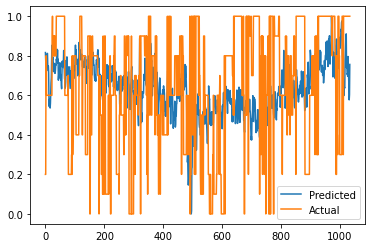

In [661]:

''' Linear Regression '''

reg = LinearRegression()
reg.fit(X,y)
preds = reg.predict(X_test)
error = y_test - preds

ok = pd.DataFrame([preds, y_test]).T
ok.columns = ['Predicted', 'Actual']
sc = MinMaxScaler()
ok_scaled = pd.DataFrame(sc.fit_transform(ok), index = ok.index, columns=ok.columns)
ok_scaled.plot()


In [1166]:

''' Random Forest '''

forest = RandomForestClassifier()

forest.fit(X,y)

forest_preds = forest.predict(X_test)

important_features = pd.Series(forest.feature_importances_, index = consideration_df.iloc[:,:-2].columns)

#accuracy_score(y_test, forest_preds)


In [1167]:
for_function = assessment_df.copy()

predicted_returns = []

for num, i in enumerate(forest_preds):
    
    #if i == 10:
    predicted_returns.append(assessment_df.iloc[num,:11][sector_labels_reverse[i]])
    #else:
        #predicted_returns.append(assessment_df.iloc[num,:11][sector_labels_reverse[i]])
    
# [sector_labels_reverse[i] for i in forest_preds]
assessment_df['predicted_top_sector'] = list(map(lambda n : sector_labels_reverse[n], forest_preds))
# [sector_labels_reverse[i] for i in consideration_df[cutoff:]['top_sector']]
assessment_df['actual_top_sector'] = list(map(lambda n : sector_labels_reverse[n], y_test))
assessment_df['predicted_top_sector_returns'] = predicted_returns
#assessment_df['predicted_top_sector_returns'] = list(map(lambda sec, n : assessment_df[sector_labels_reverse[sec]].iloc[n], 
                                                                 #forest_preds, range(len(forest_preds))))
assessment_df['actual_top_sector_returns'] = consideration_df[cutoff:]['top_sector_returns']
assessment_df = assessment_df.iloc[:,len(sector_exposure.sectors):]

assessment_df['correct_choice'] = (assessment_df.predicted_top_sector == assessment_df.actual_top_sector).astype(int)



In [1191]:

counts = []
count = 0

for num, i in enumerate(assessment_df.predicted_top_sector):
    
    if num > 0 and i == assessment_df.predicted_top_sector[num-1]:
        count += 1
        counts.append(count)
    else:
        count = 0
        counts.append(count) 

assessment_df['consecutive_signals'] = counts


In [1199]:


def with_respect_to(df, compare, compare_against):
    
    with_respect = {}
    
    for i in df[compare].sort_values().unique():
        
        with_respect[i] = df[compare_against].loc[ df[compare] == i].mean()
    
    return pd.DataFrame(with_respect, index = ['mean_returns'])

#plt.scatter(assessment_df.consecutive_signals, assessment_df.actual_top_sector_returns)

#assessment_df.predicted_top_sector_returns.loc[assessment_df.correct_choice == 1].hist()
#assessment_df.predicted_top_sector_returns.loc[assessment_df.correct_choice == 0].hist()


mean_rets_per_consecutive_signals = with_respect_to(assessment_df, "consecutive_signals", "actual_top_sector_returns")

mean_rets_per_predicted_sector = with_respect_to(assessment_df, "predicted_top_sector", "predicted_top_sector_returns")


In [1205]:


mean_rets_per_predicted_sector.T


#assessment_df.predicted_top_sector_returns.loc[ assessment_df.predicted_top_sector == "Energy" ].hist()

assessment_df.predicted_top_sector_returns.sort_values()



2020-02-13   -0.226676
2020-02-20   -0.183878
2020-07-24   -0.149455
2021-07-02   -0.148171
2021-06-22   -0.147127
                ...   
2021-12-21    0.281722
2020-03-23    0.281898
2021-12-20    0.289506
2021-12-22    0.298917
2021-12-23    0.323534
Name: predicted_top_sector_returns, Length: 800, dtype: float64

0.0038213744874741632

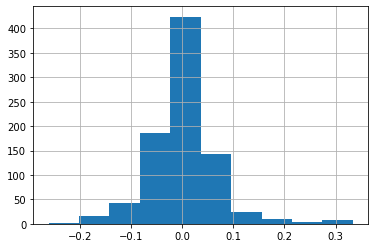

In [1143]:

assessment_df.sort_values(by="predicted_top_sector_returns")[:30]
without_energy = assessment_df.loc[assessment_df["predicted_top_sector"] != "Energy"]

assessment_df.predicted_top_sector_returns.hist()

#without_energy.predicted_top_sector_returns.mean()
assessment_df.predicted_top_sector_returns.mean()

#assessment_df[-30:]
#assessment_df.sort_values(by ='predicted_top_sector_returns')

#assessment_df.predicted_top_sector.value_counts()


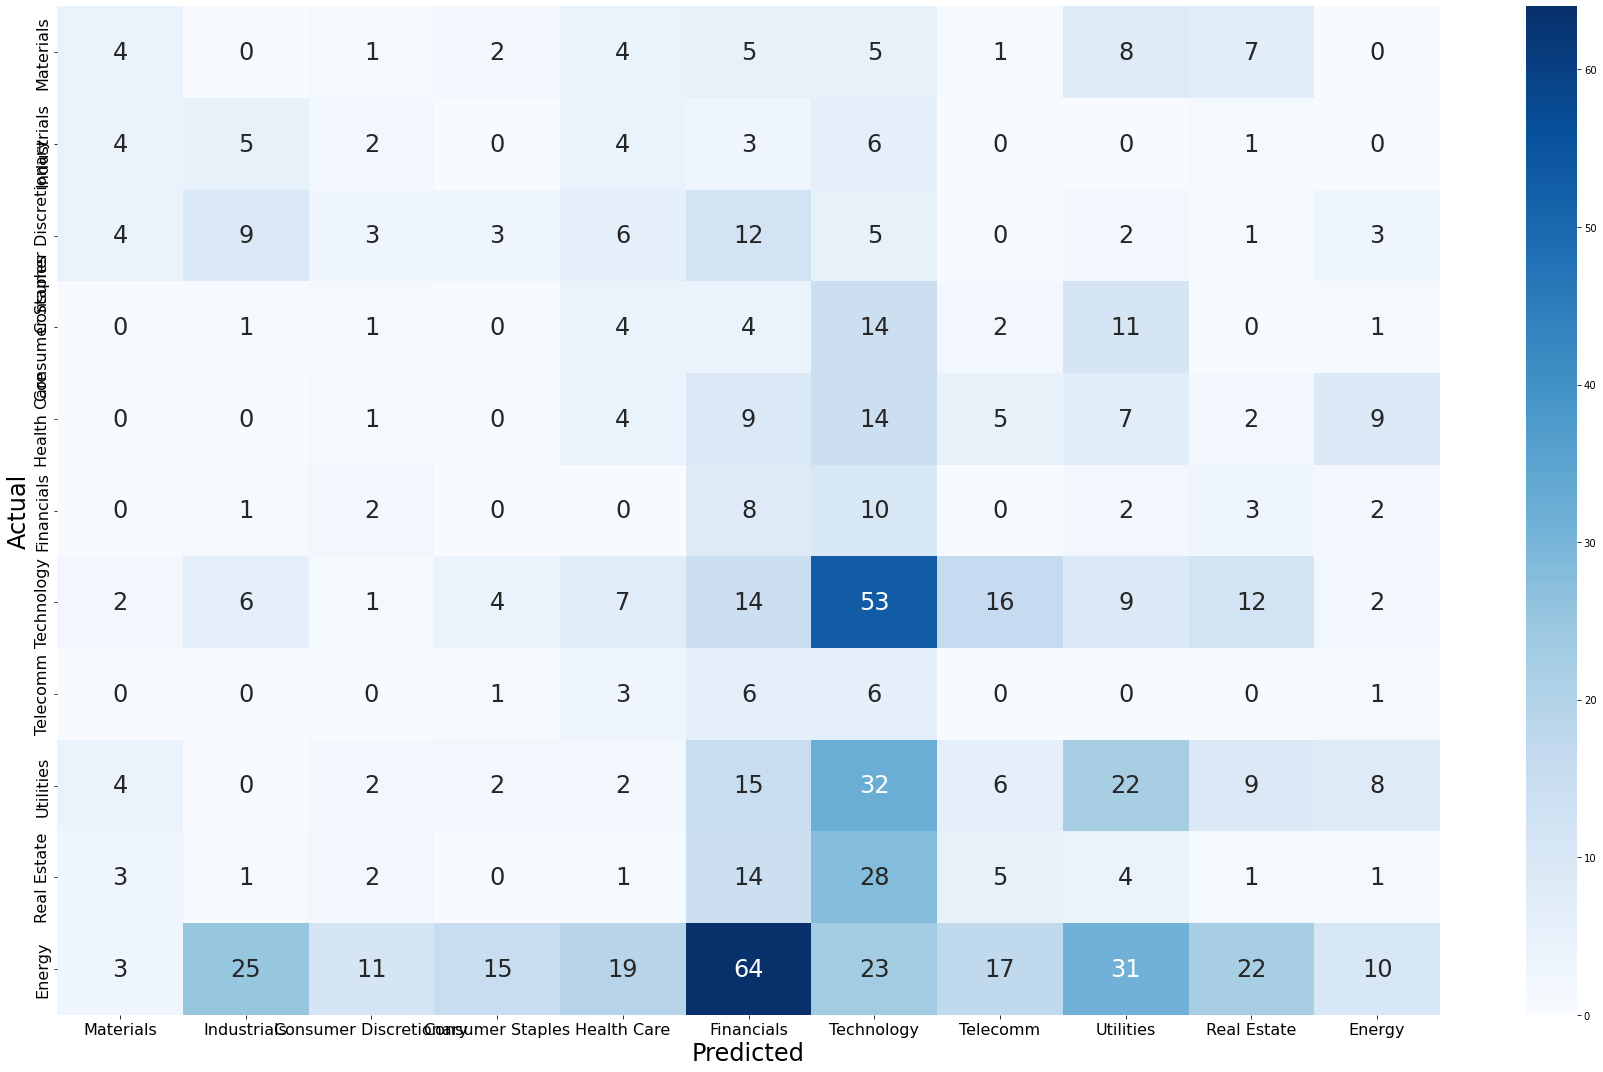

In [1053]:
import seaborn as sns

confusion = confusion_matrix(y_test, forest_preds)

plt.figure(figsize=(25,15))
fig = sns.heatmap(confusion, annot=True, annot_kws = {'fontsize' : 24}, cmap='Blues')
fig.set_xticklabels(list(sector_labels.keys()), size = 16)
fig.set_yticklabels(list(sector_labels.keys()), size = 16)
#fig.set_title("Neural Network Predictions vs Actual Table Positions", size = 26)
fig.set_xlabel("Predicted", size = 24)
fig.set_ylabel("Actual", size = 24)
plt.tight_layout()

array([0.10810811, 0.2       , 0.0625    , 0.        , 0.07843137,
       0.28571429, 0.42063492, 0.        , 0.21568627, 0.01666667,
       0.04166667])

In [840]:

def see_results(preds):
    
    predicted_returns = []
    for num, i in enumerate(preds):

        predicted_returns.append(for_function.iloc[num,:11][sector_labels_reverse[i]])
    predicted_returns= pd.Series(predicted_returns, index = consideration_df[cutoff:].index)

    return predicted_returns.mean()



In [841]:

def run_knn(n):
    
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X,y)

    knn_preds = knn.predict(X_test)
    
    # accuracy_score(y, knn_preds)
    return see_results(knn_preds)



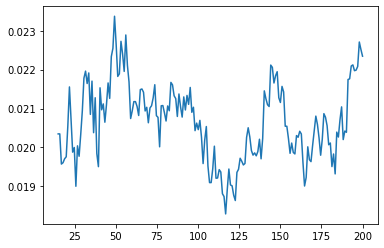

In [842]:

results = {}

for i in np.linspace(15,200, 190):
    
    results[i] = run_knn(int(i))

plt.plot(list(results.keys()), list(results.values()))


In [815]:

knn = KNeighborsClassifier(n_neighbors=76)

knn.fit(X,y)
knn_preds = knn.predict(X_test)
accuracy_score(y_test, knn_preds), see_results(knn_preds) 
# * 12.6

(0.20915841584158415, 0.02178463523902273)

In [322]:

labels_with_index = pd.Series(y_test)

means_3 = np.mean(X_test[:,2])
means_4 = np.mean(X_test[:,3])
means_5 = np.mean(X_test[:,4])

#labels_with_index


In [323]:

colors_top_4 = {0 : "red", 1: 'green'}
ygrid = np.arange(min(X_test[:,0]), max(X_test[:,0])+.05,.1)
xgrid = np.arange(min(X_test[:,1]),max(X_test[:,1])+.05,.1)
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([ygrid[j], xgrid[i], means_3, means_4, means_5])
        z[i,j]= knn.predict(x[np.newaxis,:])

colorsnum = {0 : "red", 1: 'green'}
c = [colorsnum[i] for i in z.reshape(-1)]

plt.figure(figsize=(12,8))
plt.scatter(yax,xax, color=c, alpha=.2)
plt.scatter(X_test[:,0], X_test[:,1], c = labels_with_index.map(colors_top_4))
plt.xlabel("Principle Component 1", size = 26)
plt.ylabel("Principle Component 2", size = 26)
plt.title("Bayes Decision Boundaries Between Top 4, Mid-Table, and Relegation", size = 26)
plt.tight_layout()


ValueError: X has 5 features, but KNeighborsClassifier is expecting 7 features as input.

In [605]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(sector_df.columns)-1)

pca.fit(X)

variance_explained = pca.explained_variance_ratio_

variance_explained


array([0.52059264, 0.38986418, 0.08954317])

<AxesSubplot:>

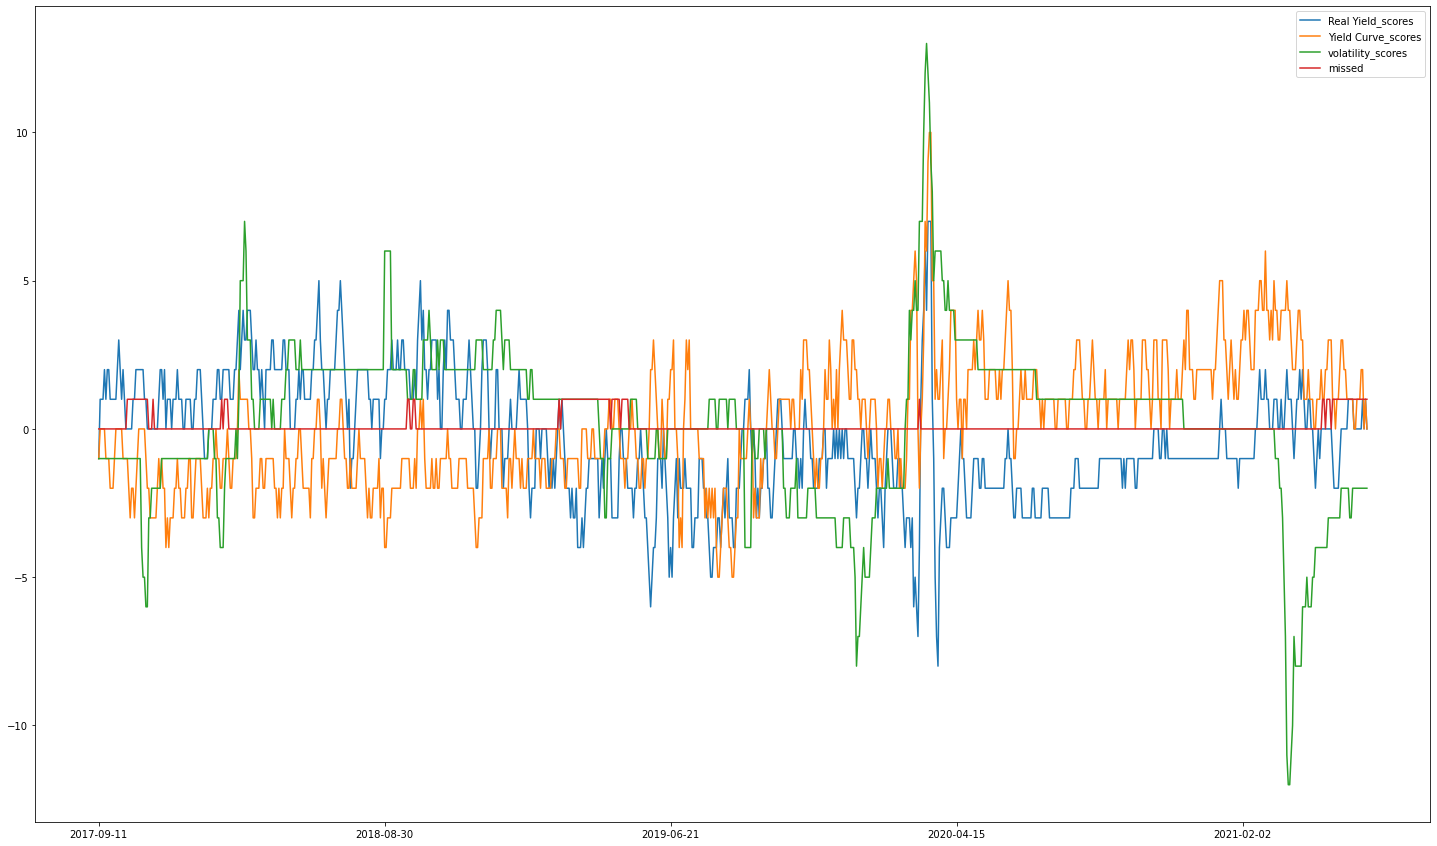

In [606]:

consideration_df_test = consideration_df.iloc[:,1:][cutoff:]

knn_preds = pd.Series(knn_preds, index = consideration_df[cutoff:].index)
y_test_labeled = pd.Series(y_test, index = consideration_df[cutoff:].index)

missed = abs(knn_preds - y_test_labeled)

consideration_df_test['missed'] = missed

#(abs(knn_preds - y_test_labeled)).plot(figsize = (20,10))

sc = MinMaxScaler()

consideration_df_test_scaled = pd.DataFrame(sc.fit_transform(consideration_df_test), columns= consideration_df_test.columns, index = consideration_df_test.index)

# [['missed', 'SP-500_scores']]
consideration_df_test.plot(figsize = (25,15))


In [816]:
from sklearn.neural_network import MLPClassifier

''' Neural Network '''

clf = MLPClassifier(shuffle = True, max_iter=1000).fit(X, y)

preds = clf.predict(X_test)

accuracy_score(y_test, preds)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4876237623762376

In [817]:


see_results(preds)


0.06397191610176005

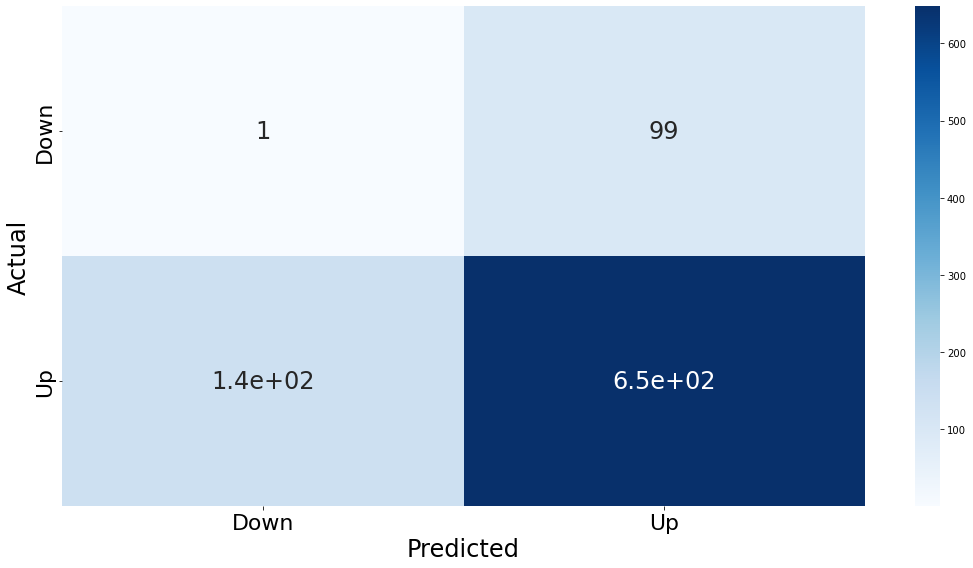

In [608]:
import seaborn as sns

confusion = confusion_matrix(y_test, preds)

plt.figure(figsize=(15,8))
fig = sns.heatmap(confusion, annot=True, annot_kws = {'fontsize' : 24}, cmap='Blues')
fig.set_xticklabels(['Down', 'Up'], size = 22)
fig.set_yticklabels(['Down', 'Up'], size = 22)
#fig.set_title("Neural Network Predictions vs Actual Table Positions", size = 26)
fig.set_xlabel("Predicted", size = 24)
fig.set_ylabel("Actual", size = 24)
plt.tight_layout()


In [153]:


93 / (120 + 93)



0.43661971830985913